### Dataset description

This dataset contains information about Sales Values in Dollars on American Stores between 2010 and 2011. In particular, this dataset contains:

Stores' Area, State, Region and Size;
Products' ID, Description, Type, Category and Sale Date;
Accounting Info, such as Budget Margin, Profit, Total Expenses and Marking.

The data was extracted between January 1th in 2010 and December 31th in 2011.

### Variables description

* Area Code: Store's Code;
* State: Store's State;
* Market: Store's Region;
* Market Size: Store's Size;
* Profit: Profits in Dollars `($)`;
* Margin: Profit + Total Expenses `($)` OR Sales - COGS `($)`;
* Sales: Values Acquired in Sales `($)`;
* COGS: Cost of Goods Sold `($)`;
* Total Expenses: Total Expenses to get the Product to Sell `($)`;
* Marketing: Expenses in Marketing `($)`;
* Inventory: Inventory Value of the Product in the Sale Moment `($)`;
* Budget Profit: Expected Profit `($)`;
* Budget COGS: Expected COGS `($)`;
* Budget Margin: Expected Profit + Expected Total Expenses `($)` OR Expected Sales - Expected COGS `($)`;
* Budget Sales: Expected Value Acquired in Sales `($)`;
* ProductID: Product ID;
* Date: Sale Date;
* Product Type: Product Category;
* Product: Product Description;
* Type: Type;

### Imports

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from fast_ml.model_development import train_valid_test_split
import itertools as it
from statsmodels.stats.outliers_influence import variance_inflation_factor


### Load the data

In [60]:
df = pd.read_csv("sales.csv")

### Show basic information about the dataset

In [61]:
df.head()

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular


In [62]:
df.dtypes

Area Code           int64
State              object
Market             object
Market Size        object
Profit            float64
Margin            float64
Sales             float64
COGS              float64
Total Expenses    float64
Marketing         float64
Inventory         float64
Budget Profit     float64
Budget COGS       float64
Budget Margin     float64
Budget Sales      float64
ProductId           int64
Date               object
Product Type       object
Product            object
Type               object
dtype: object

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area Code       4248 non-null   int64  
 1   State           4248 non-null   object 
 2   Market          4248 non-null   object 
 3   Market Size     4248 non-null   object 
 4   Profit          4248 non-null   float64
 5   Margin          4248 non-null   float64
 6   Sales           4248 non-null   float64
 7   COGS            4248 non-null   float64
 8   Total Expenses  4248 non-null   float64
 9   Marketing       4248 non-null   float64
 10  Inventory       4248 non-null   float64
 11  Budget Profit   4248 non-null   float64
 12  Budget COGS     4248 non-null   float64
 13  Budget Margin   4248 non-null   float64
 14  Budget Sales    4248 non-null   float64
 15  ProductId       4248 non-null   int64  
 16  Date            4248 non-null   object 
 17  Product Type    4248 non-null   o

Data types are mostly of type "object" although most of them are in fact of type "category" (State, Market, Market Size, Product Type, Product, Type) one is a Timestamp (Date). Therefore, in the next step the data type will be changed and the Date column will be dropped because it cannot be analyzed due to legal issues.

In [64]:
df[['Area Code', 'State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type', 'ProductId']] = df[['Area Code', 'State', 'Market', 'Market Size', 'Product Type', 'Product', 'Type', 'ProductId']].apply(lambda x: x.astype('category'))
df_no_date=df.drop(columns='Date')
df_no_date.dtypes

Area Code         category
State             category
Market            category
Market Size       category
Profit             float64
Margin             float64
Sales              float64
COGS               float64
Total Expenses     float64
Marketing          float64
Inventory          float64
Budget Profit      float64
Budget COGS        float64
Budget Margin      float64
Budget Sales       float64
ProductId         category
Product Type      category
Product           category
Type              category
dtype: object

### Missing data

In [70]:
df_no_date.isnull().sum() #for the whole trainset check null values

Area Code         0
State             0
Market            0
Market Size       0
Profit            0
Margin            0
Sales             0
COGS              0
Total Expenses    0
Marketing         0
Inventory         0
Budget Profit     0
Budget COGS       0
Budget Margin     0
Budget Sales      0
ProductId         0
Product Type      0
Product           0
Type              0
dtype: int64

### Train, test and validation split

In [68]:

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_no_date, target = 'Profit', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(3398, 18)
(3398,)
(425, 18)
(425,)
(425, 18)
(425,)


(None, None)

### Plots

#### Categorical variables


<AxesSubplot: >

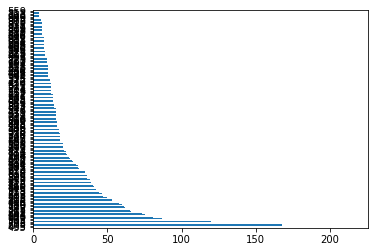

In [71]:
df_no_date['Area Code'].value_counts().plot(kind='barh')

<AxesSubplot: >

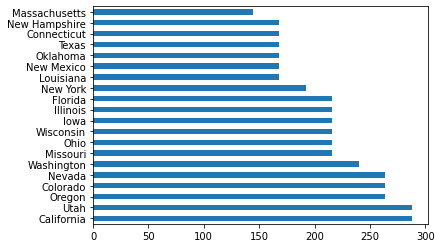

In [72]:
df_no_date['State'].value_counts().plot(kind='barh')

<AxesSubplot: >

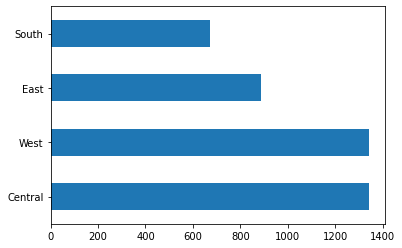

In [73]:
df_no_date['Market'].value_counts().plot(kind='barh')

<AxesSubplot: >

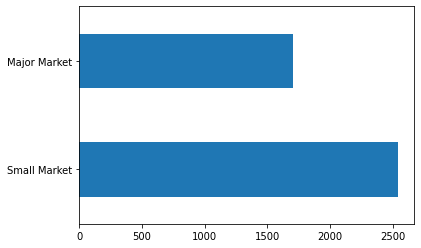

In [74]:
df_no_date['Market Size'].value_counts().plot(kind='barh')

<AxesSubplot: >

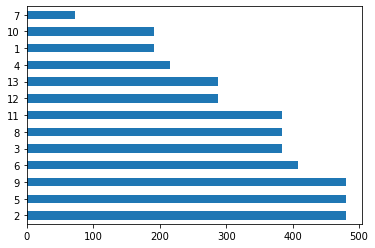

In [75]:
df_no_date['ProductId'].value_counts().plot(kind='barh')

<AxesSubplot: >

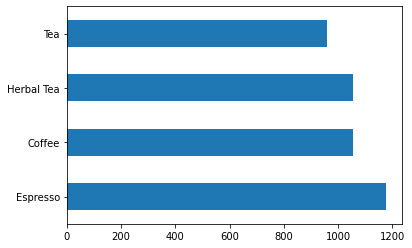

In [76]:
df_no_date['Product Type'].value_counts().plot(kind='barh')

<AxesSubplot: >

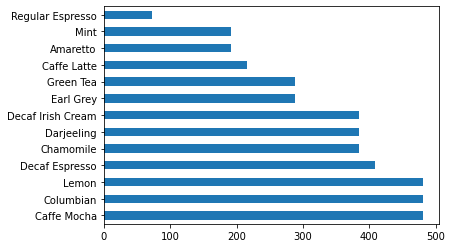

In [77]:
df_no_date['Product'].value_counts().plot(kind='barh')

<AxesSubplot: >

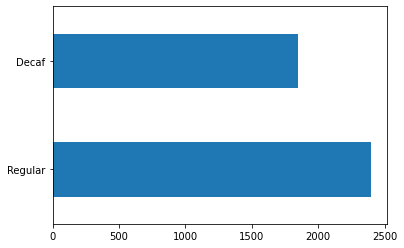

In [78]:
df_no_date['Type'].value_counts().plot(kind='barh')

#### Continuous variables


<Figure size 432x288 with 0 Axes>

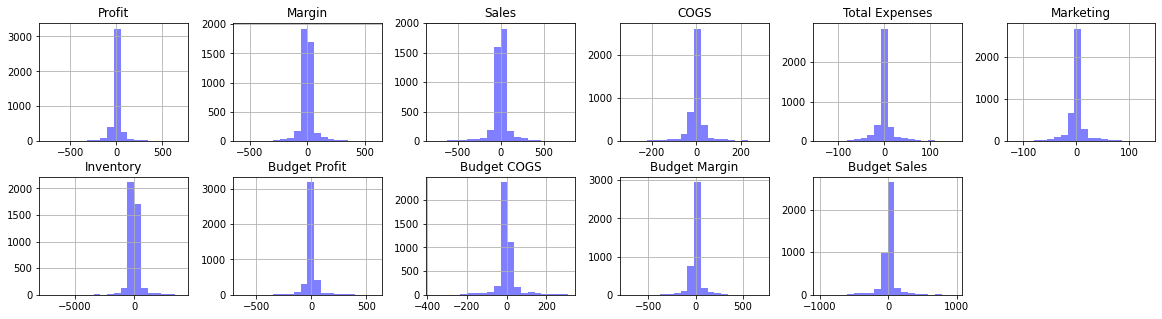

In [90]:
plt.figure();
df_no_date[['Profit', 'Margin', 'Sales', 'COGS', 'Total Expenses','Marketing','Inventory','Budget Profit','Budget COGS','Budget Margin','Budget Sales']].diff().hist(color="b", alpha=0.5, bins=20, layout=(2,6), figsize=(20,5));


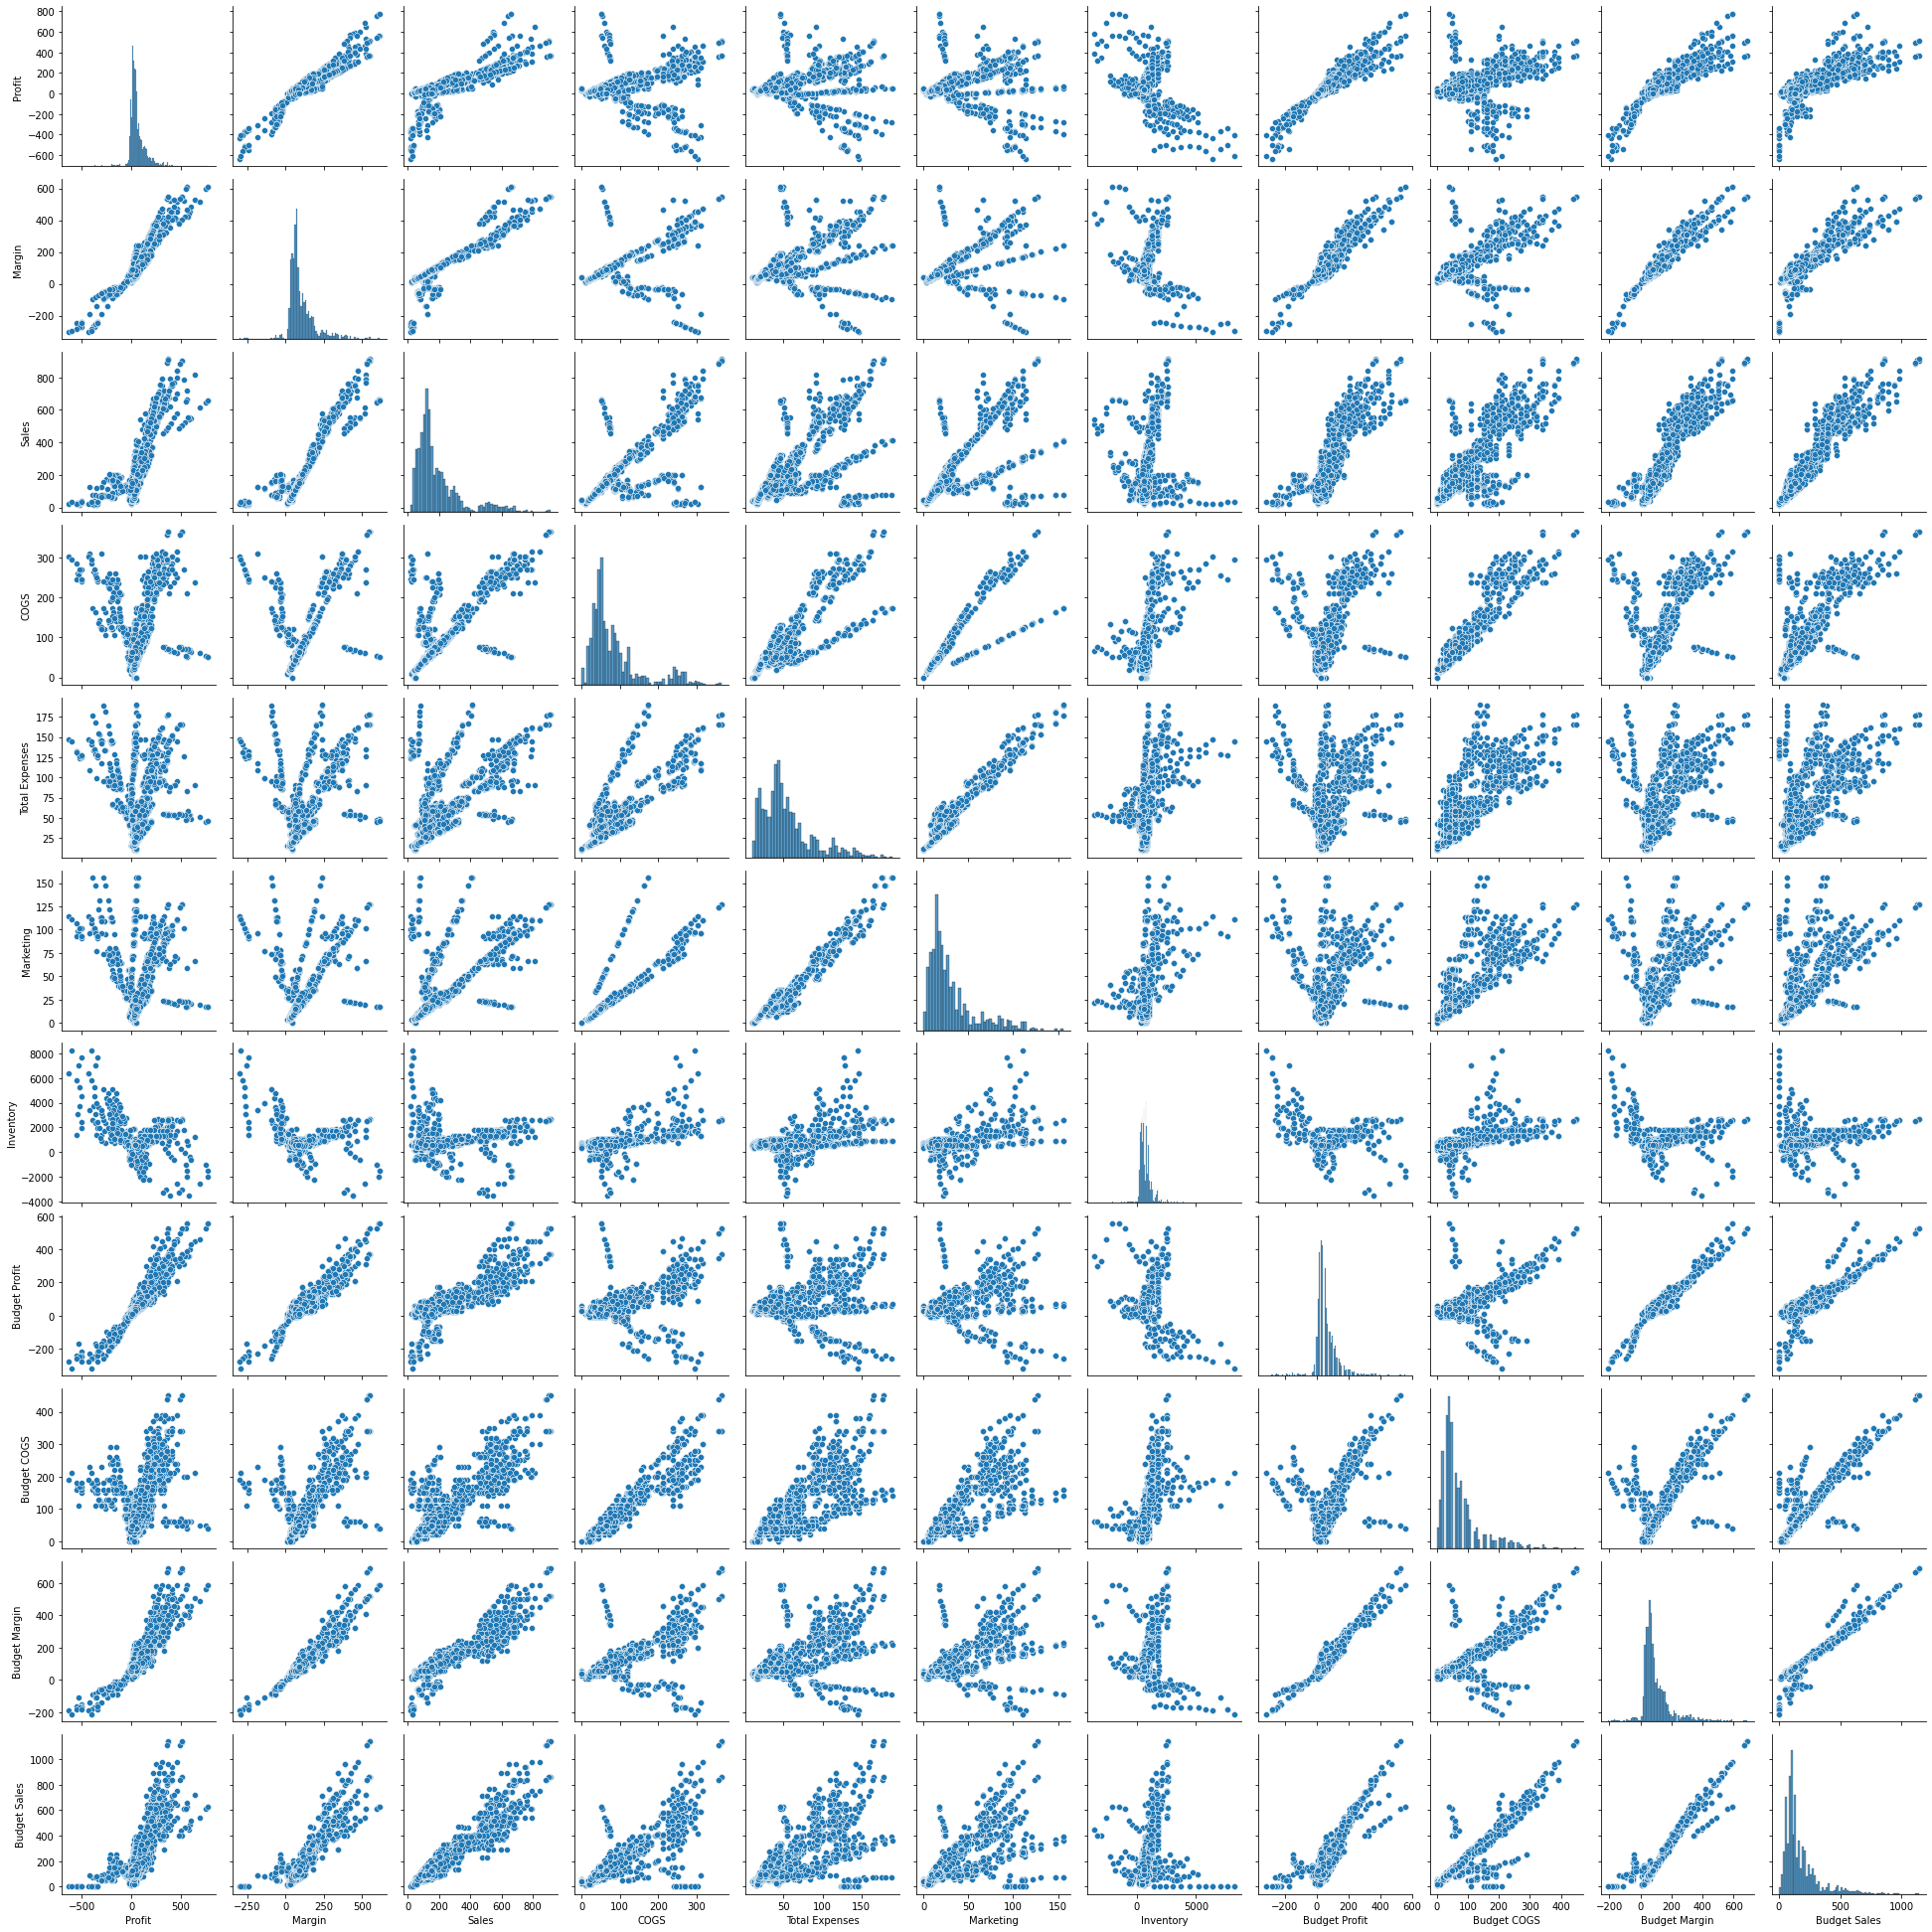

In [93]:
sns.pairplot(df_no_date, )

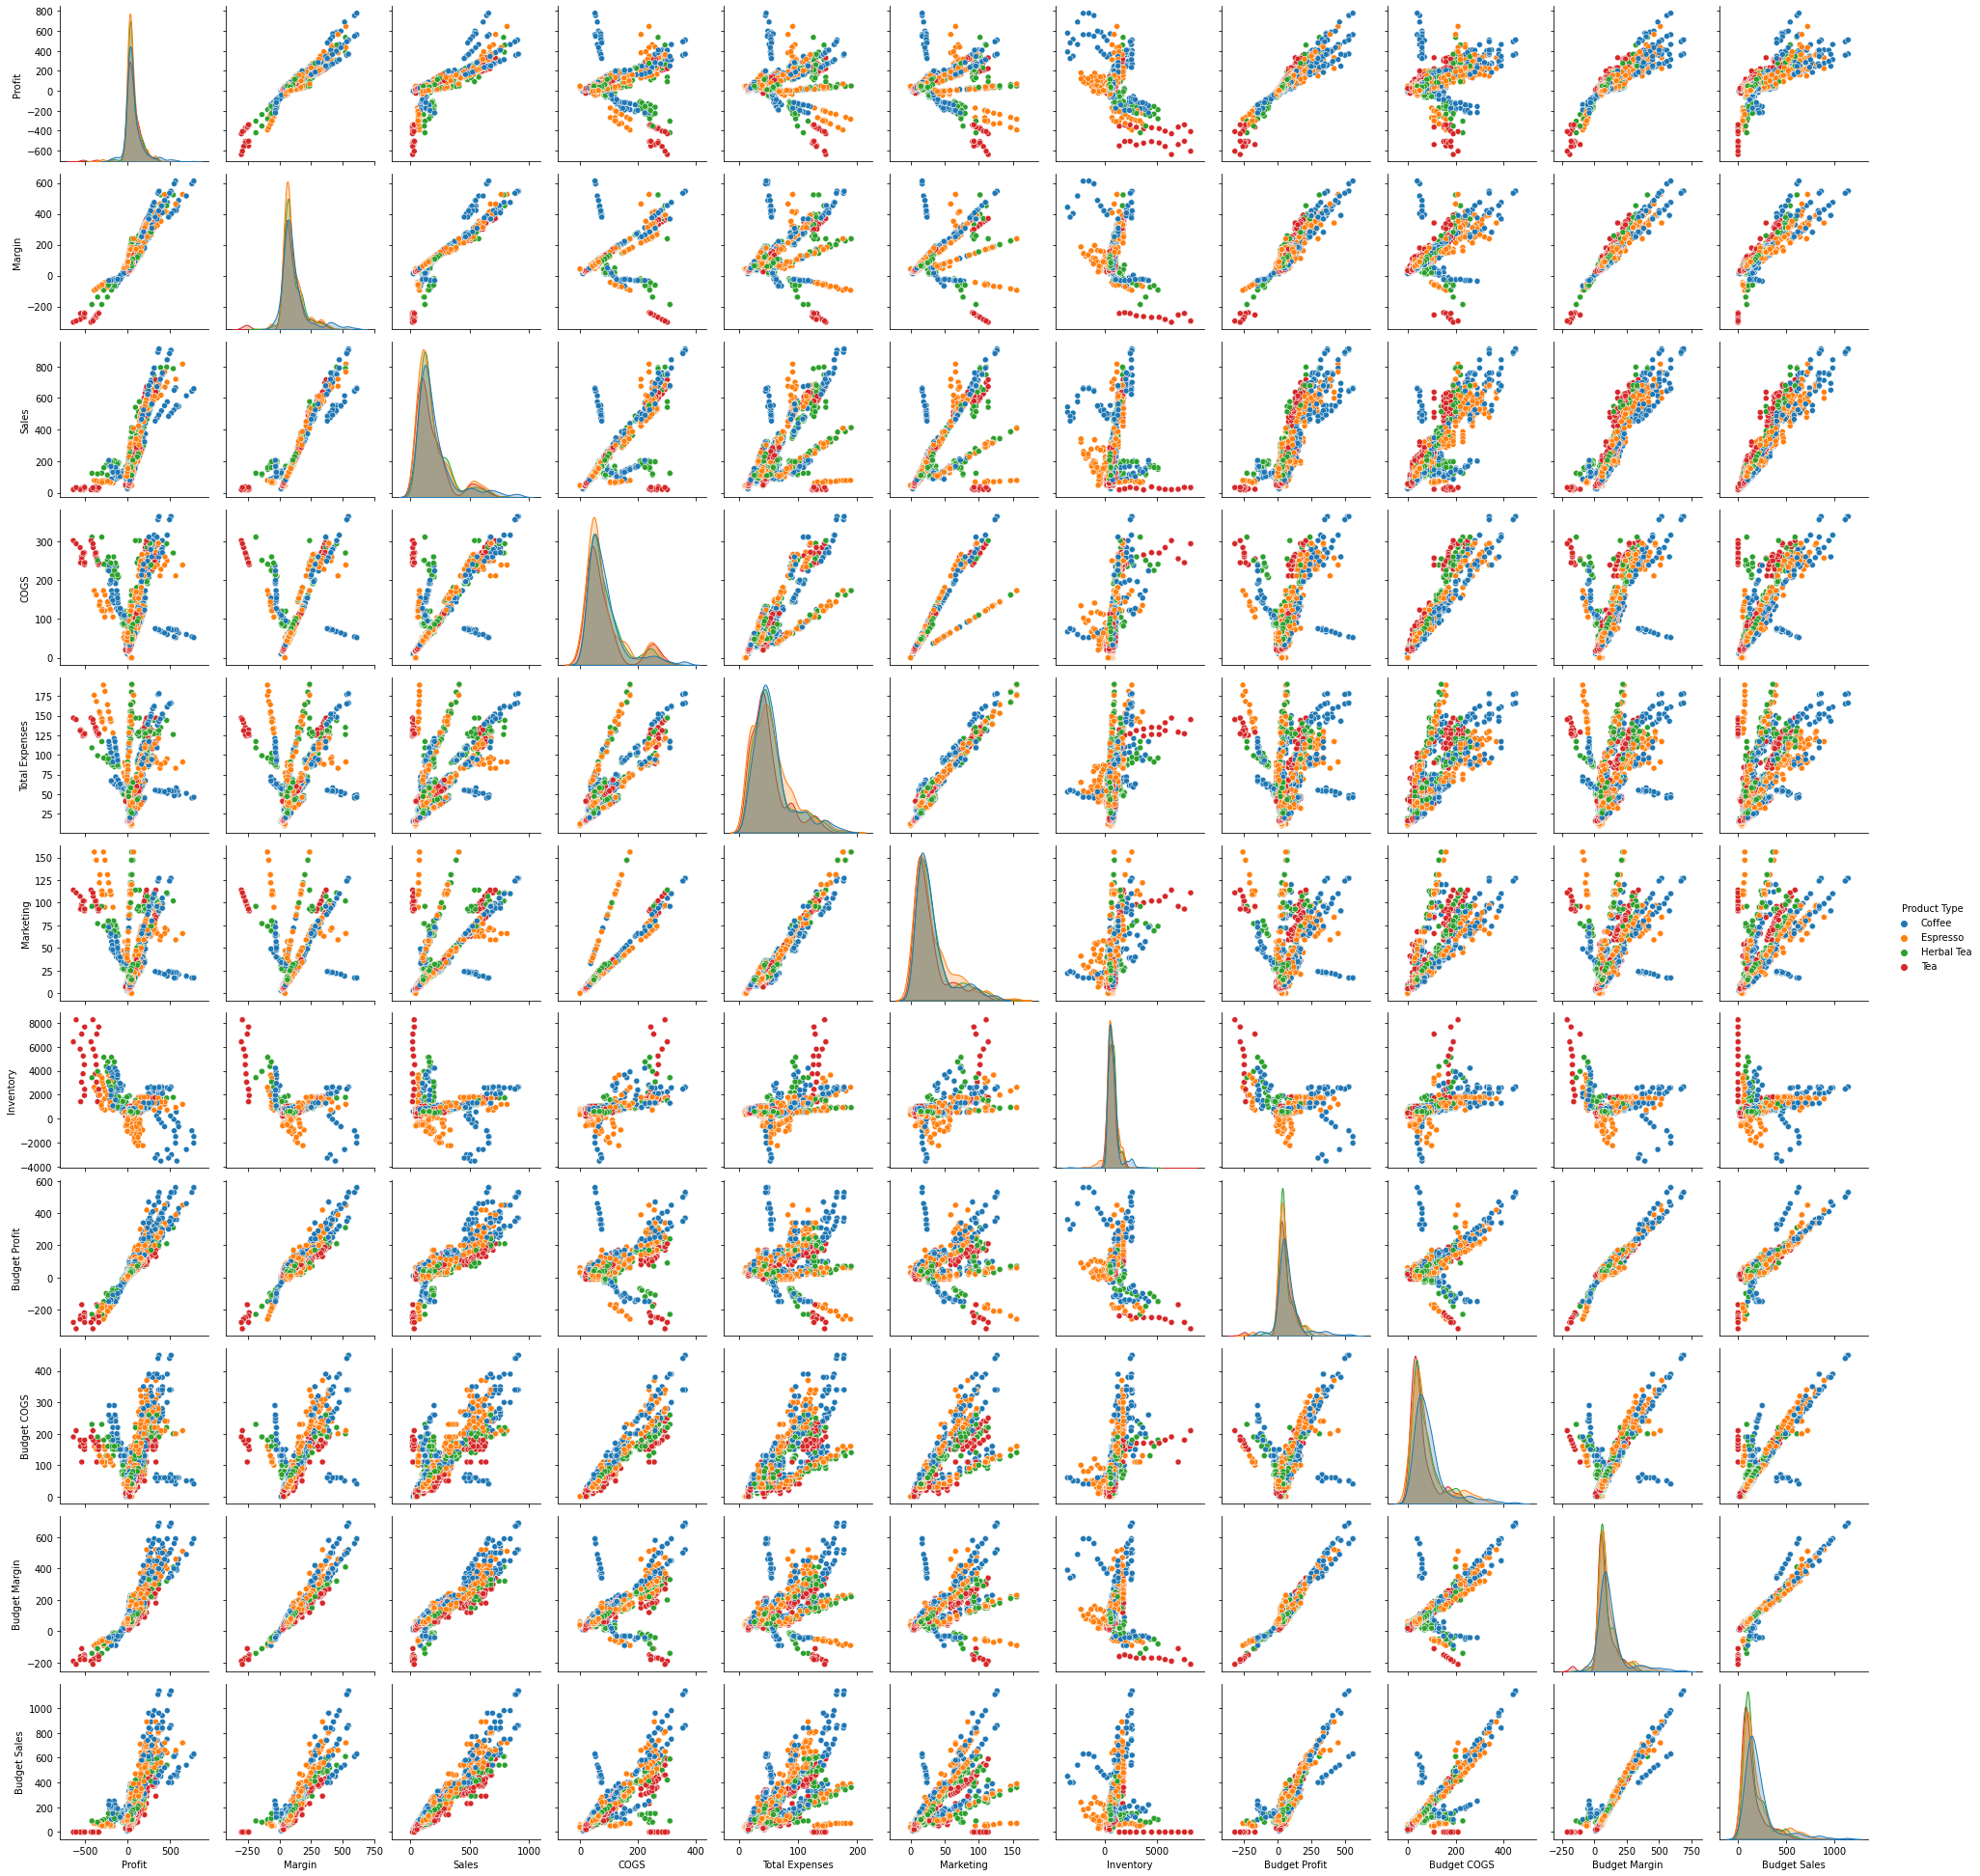

In [94]:
sns.pairplot(df_no_date, hue='Product Type')

### Create dummies  

In [100]:
df_dummies=pd.get_dummies(df_no_date)

### Detecting variables collinearity (VIF)

In [109]:
# the independent variables set
X = df_no_date.loc[:, df_no_date.columns !='Profit']
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [108]:
vif_data[vif_data["VIF"]<15]

,feature,VIF
5,Inventory,3.498203
